In [1]:
import pandas as pd
import numpy as np
import igraph as ig
import seaborn as sns
import os
import matplotlib.pyplot as plt
os.chdir('..')
import functions.myfunctions as mf
from PairingVDJdb_GA import get_mode, check_correct_pairs_ID
from PairingVDJdb_MI import _define_individuals

In [2]:
vdj = pd.read_csv('data/vdj_cleaned_subset_for_MI.csv', index_col=0).drop('Unnamed: 0', axis=1)
vdj = vdj.replace('https://www.10xgenomics.com/resources/application-notes/a-new-way-of-exploring-immunity-linking-highly-multiplexed-antigen-recognition-to-immune-repertoire-and-phenotype/#', '10xGenomics')
vdj = vdj.replace('https://github.com/antigenomics/vdjdb-db/issues/*', 'GitHubIssue', regex=True)
vdj = vdj.loc[vdj['Epitope'] != 'KLGGALQAK'] # because too big - takes forever
epitopes = vdj['Epitope'].unique().tolist()
# epcounts = vdj['Epitope'].value_counts()
# epitopes = epcounts.loc[epcounts<1000].index.values
# vdj = vdj.loc[vdj['Epitope'].isin(epitopes)]

In [3]:
ff0 = 'data/output/pairing_GA/all_eps/'
ff1 = 'data/output/pairing_GA/big_eps/'

In [4]:
chosenDist='lev'

GA-epitope-ASNENMETM_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz


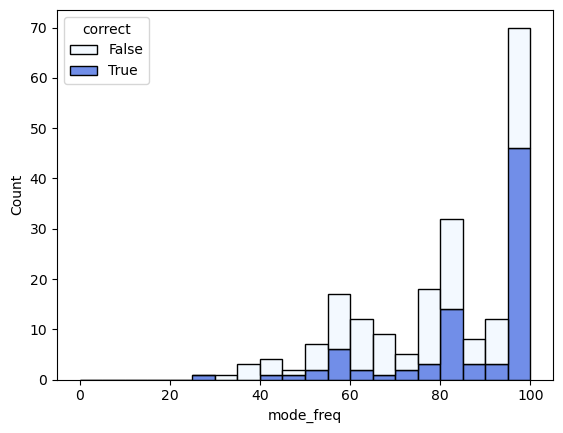

GA-epitope-ATDALMTGF_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz


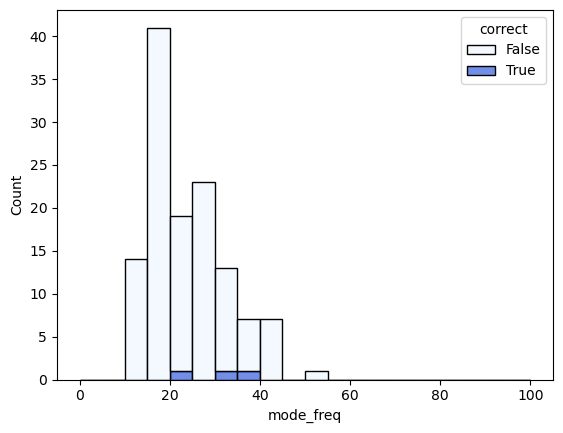

GA-epitope-CINGVCWTV_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz


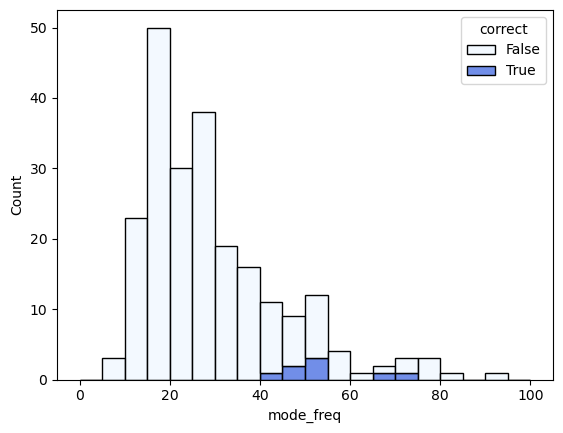

GA-epitope-ELAGIGILTV_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz


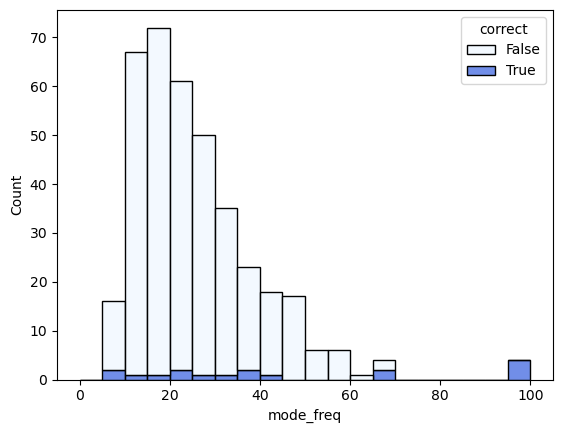

GA-epitope-GLCTLVAML_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz


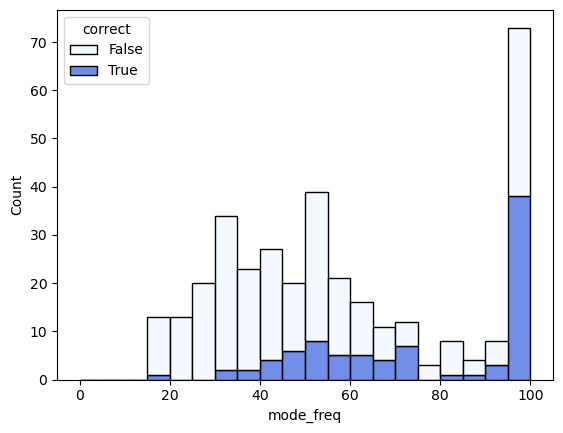

GA-epitope-HGIRNASFI_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz


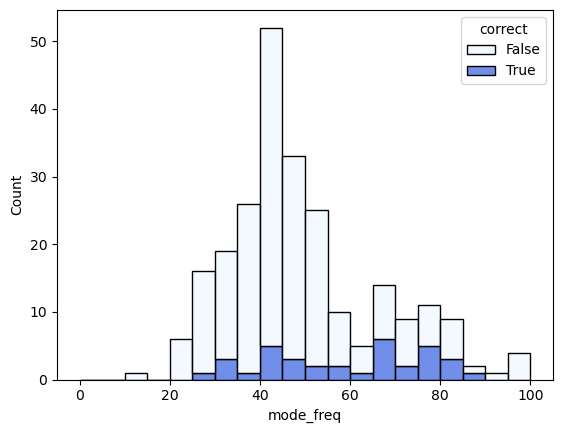

GA-epitope-IVTDFSVIK_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz


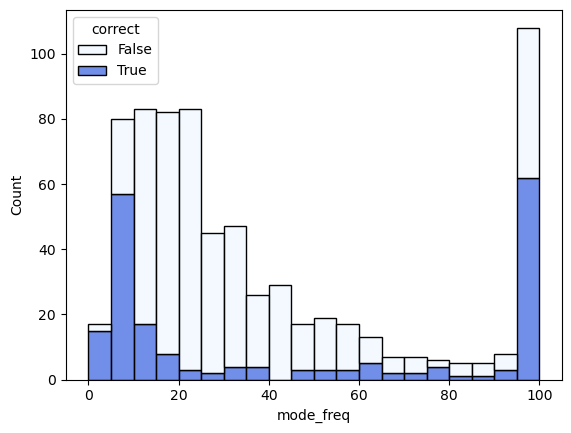

GA-epitope-KSKRTPMGF_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz


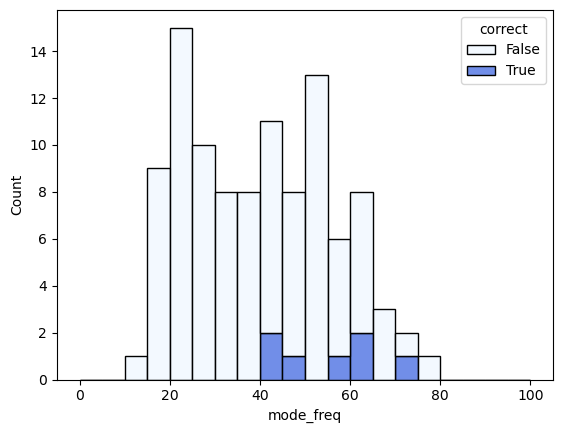

GA-epitope-LLWNGPMAV_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz


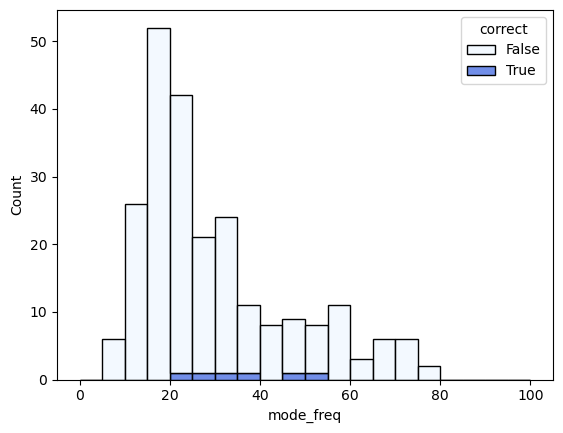

GA-epitope-LSLRNPILV_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz


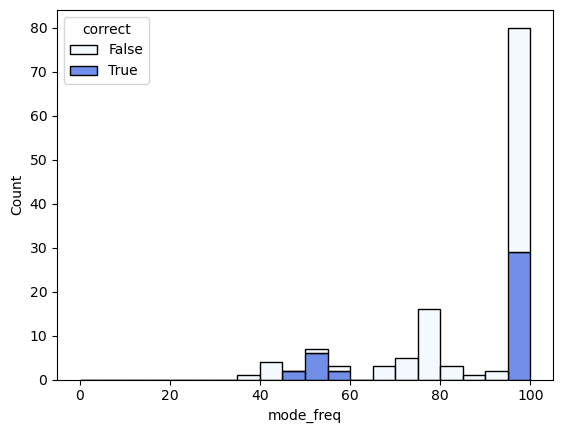

GA-epitope-LTDEMIAQY_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz


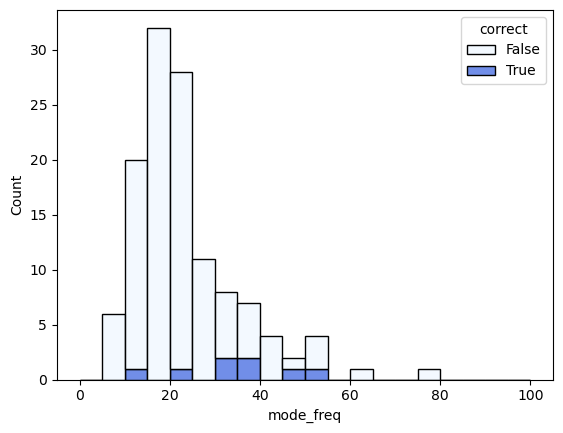

GA-epitope-NLVPMVATV_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz


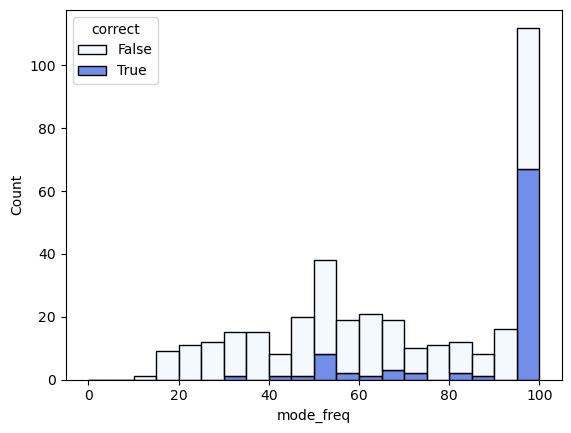

GA-epitope-RLRAEAQVK_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz


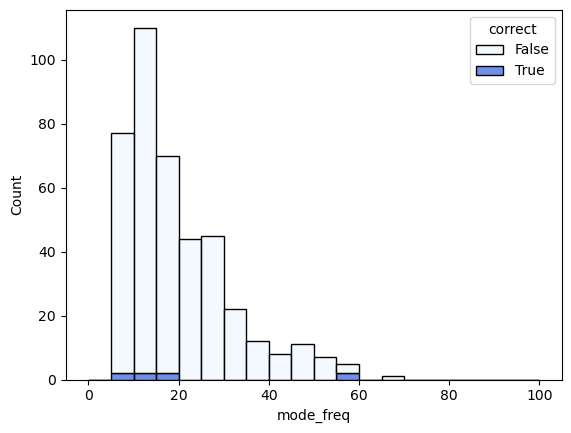

GA-epitope-SPRWYFYYL_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz


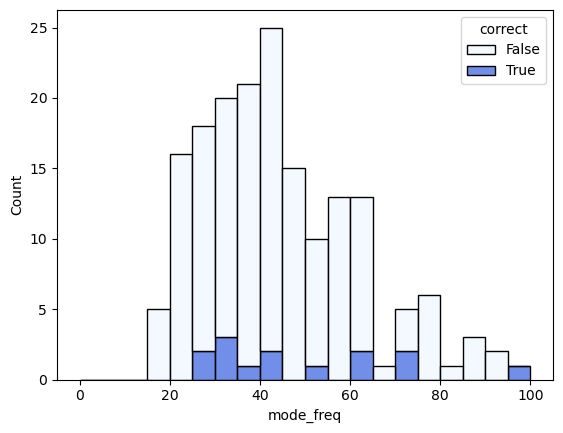

GA-epitope-SSLENFRAYV_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz


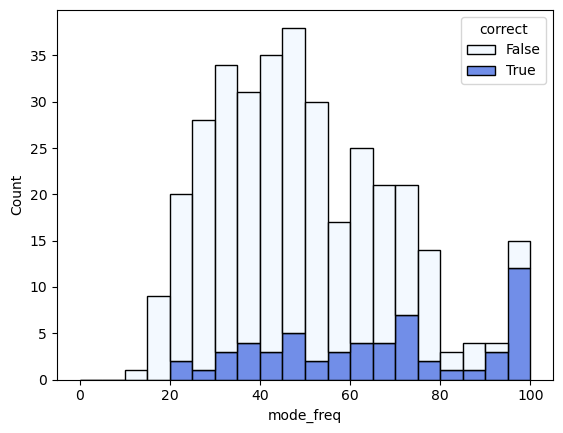

GA-epitope-SSPPMFRV_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz


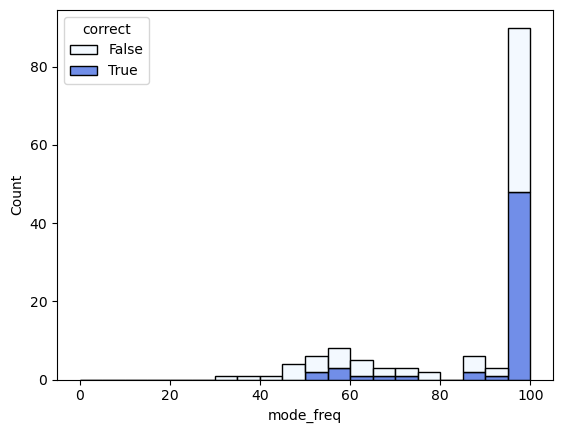

GA-epitope-SSYRRPVGI_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz


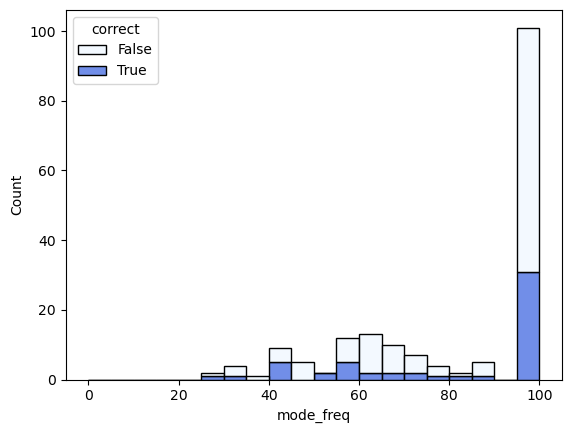

GA-epitope-TTDPSFLGRY_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz


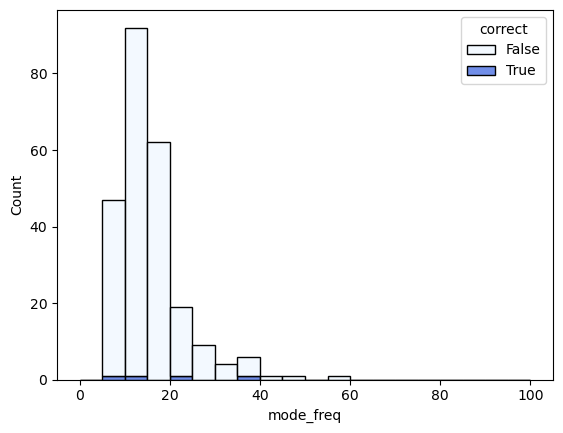

GA-epitope-YLQPRTFLL_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz


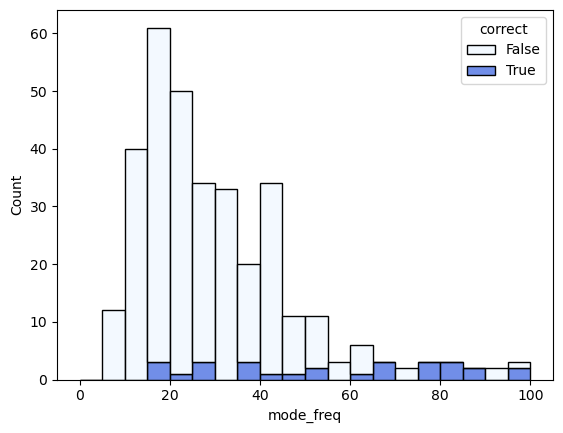

In [5]:
grouped_results = pd.DataFrame()

for f in os.listdir(ff0):
    if ('.csv' in f) & (chosenDist in f) & ('vgene-no' in f):
        print(f)
        f1 = f.replace('n_repeats', 'nrepeats')
        f1 = f1.replace('distance_type', 'distanceType')
        f1 = f1.replace('GA-', '')
        
        properties = {x.split('-')[0]:x.split('-')[1] for x in f1.split('_') if '.csv' not in x}
        r = pd.read_csv(ff0+f, index_col=0)
        # print(r)
        # print(r[['mode','mode_freq','correct']].head())
        # print()
        # epdf = _define_individuals(vdj, properties['epitope'], 'no')
        # print(epdf['subject-PMID'].value_counts())
        # print(r['subject-PMID'].value_counts())
        # print(r.loc[r['subject-PMID']=='10xGenomics_4'])

        sns.histplot(data=r, x='mode_freq', hue='correct', 
            multiple='stack', binwidth=5, binrange=(0,100), palette=['aliceblue','royalblue'], hue_order=[False,True])
        plt.show()
        grouped = r[['mode_freq','correct']].groupby(['mode_freq','correct']).size().reset_index()
        grouped['epitope'] = properties['epitope']
        grouped['N'] = r.shape[0]
        grouped_results = pd.concat([grouped_results,grouped.rename(columns={0:'counts'})])

GA-epitope-AVFDRKSDAK_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz


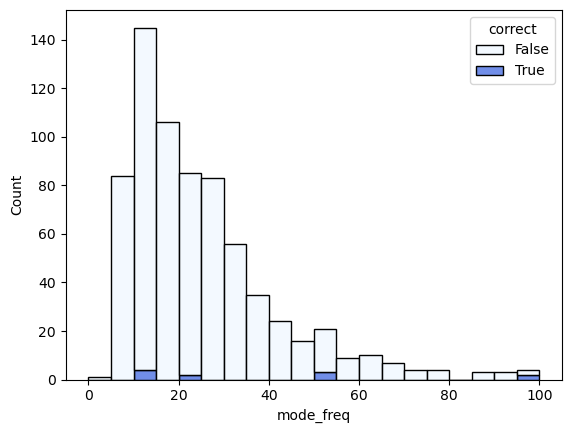

GA-epitope-GILGFVFTL_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz


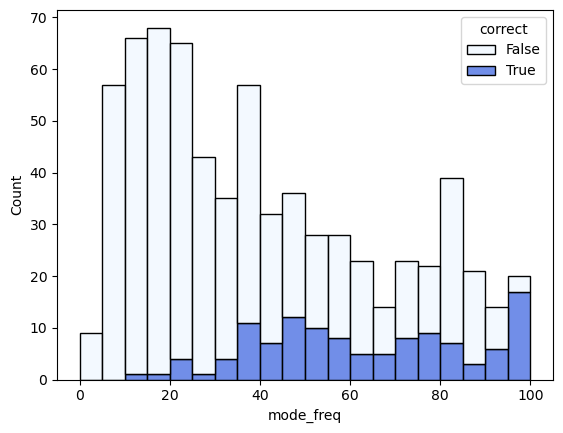

GA-epitope-RAKFKQLL_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz


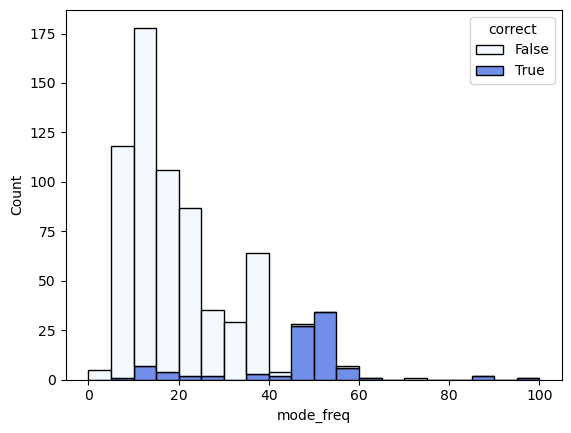

GA-epitope-AVFDRKSDAK_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz


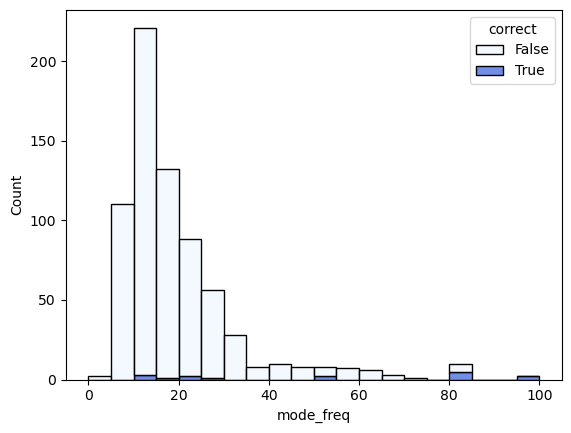

GA-epitope-GILGFVFTL_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz


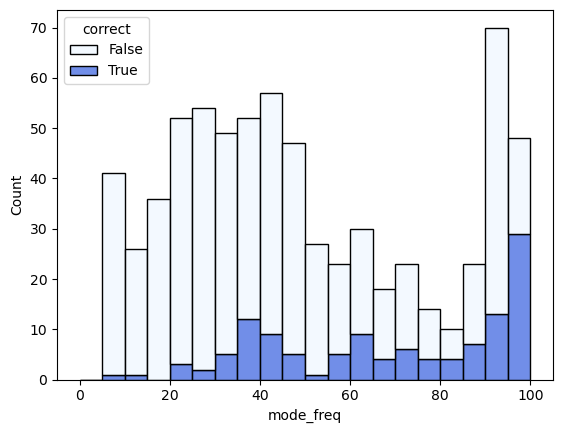

GA-epitope-RAKFKQLL_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz


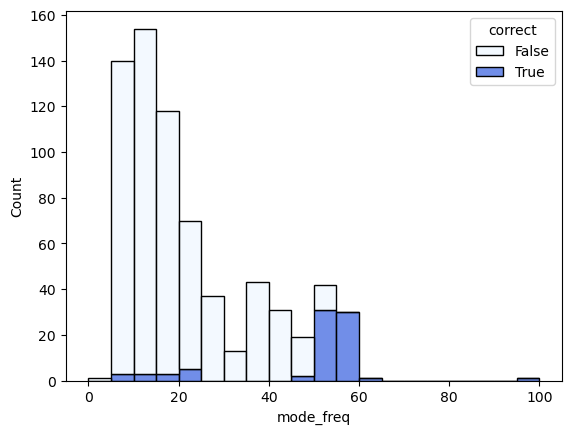

GA-epitope-AVFDRKSDAK_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz


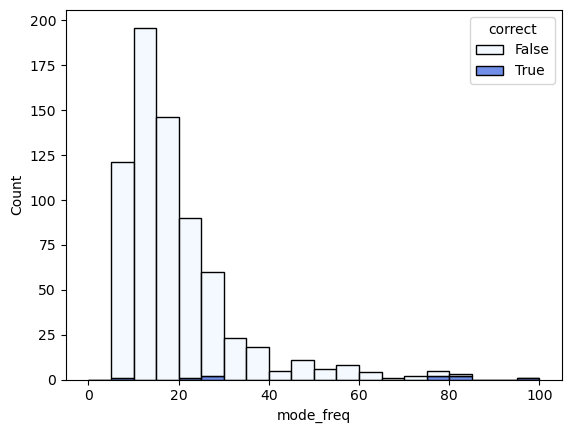

GA-epitope-GILGFVFTL_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz


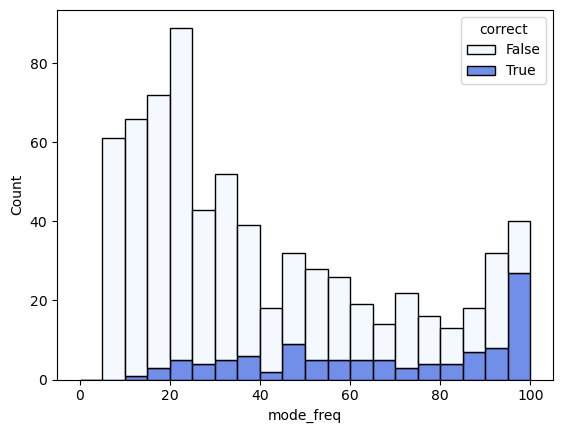

GA-epitope-RAKFKQLL_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz


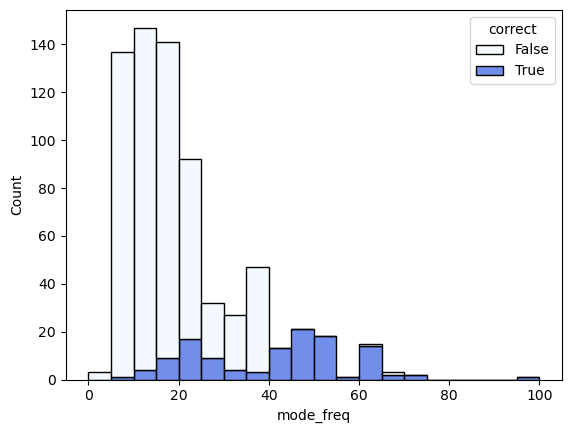

GA-epitope-AVFDRKSDAK_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz


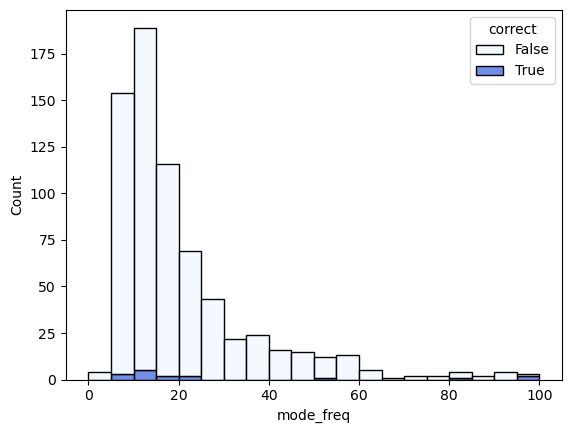

GA-epitope-GILGFVFTL_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz


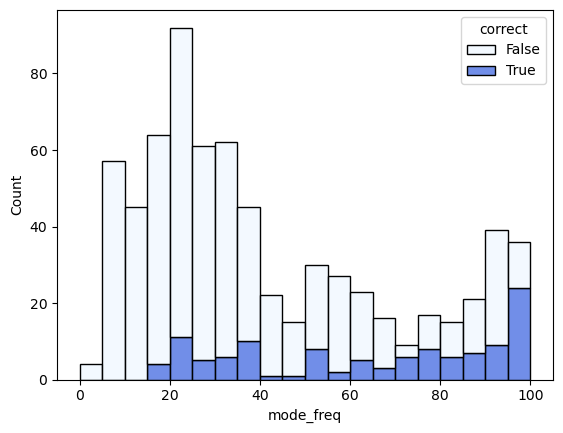

GA-epitope-RAKFKQLL_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz


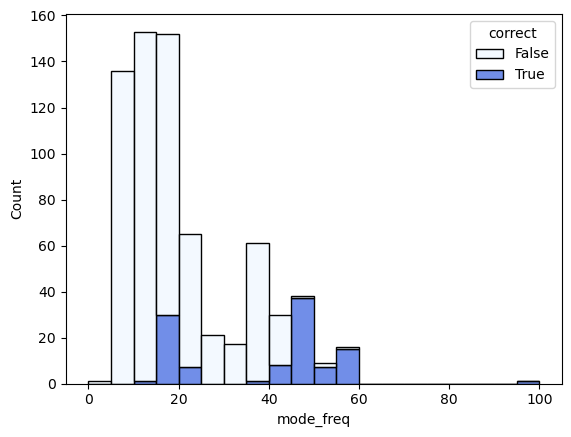

GA-epitope-AVFDRKSDAK_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz


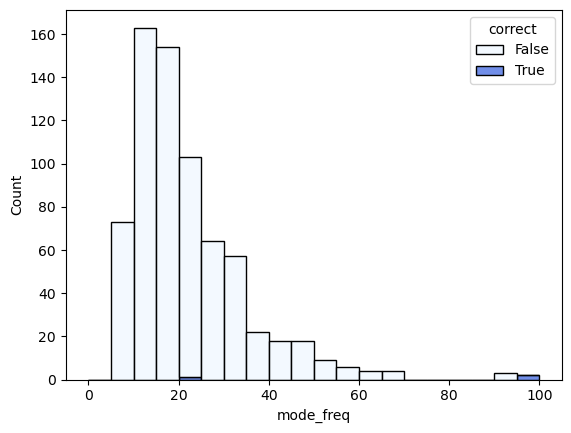

GA-epitope-GILGFVFTL_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz


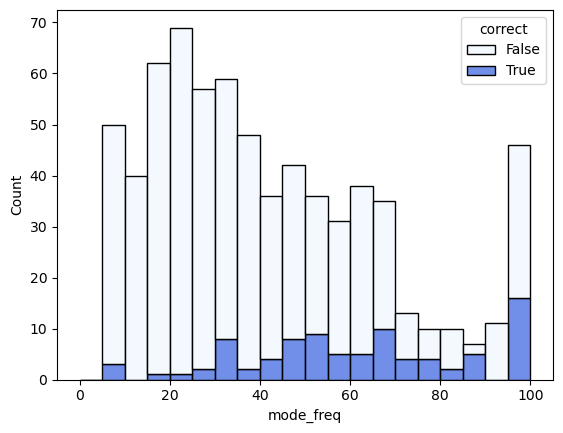

GA-epitope-RAKFKQLL_ind-no_vgene-no_distance_type-lev_kNN-20_n_repeats-100.csv.gz


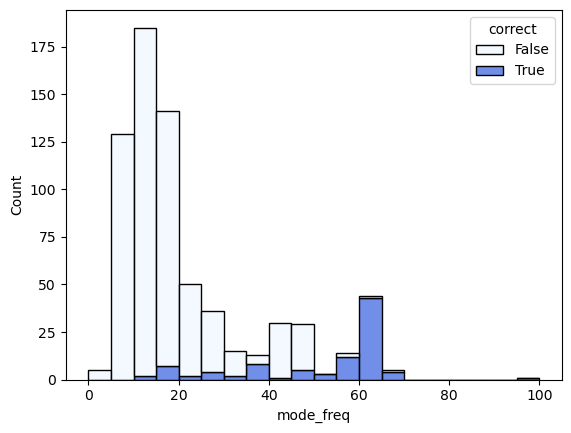

In [6]:
for ff10 in os.listdir(ff1):
    if 'txt' not in ff10:
        for f in os.listdir(ff1+ff10):
            if ('.csv' in f) & ('vgene-no' in f) & (chosenDist in f) & ('KLGGALQAK' not in f):
                print(f)
                f1 = f.replace('n_repeats', 'nrepeats')
                f1 = f1.replace('distance_type', 'distanceType')
                f1 = f1.replace('GA-', '')
                
                properties = {x.split('-')[0]:x.split('-')[1] for x in f1.split('_') if '.csv' not in x}
                r = pd.read_csv(ff1+ff10+'/'+f, index_col=0)
                # print(r)
                # print(r[['mode','mode_freq','correct']].head())
                # print()
                # epdf = _define_individuals(vdj, properties['epitope'], 'no')
                # print(epdf['subject-PMID'].value_counts())
                # print(r['subject-PMID'].value_counts())
                # print(r.loc[r['subject-PMID']=='10xGenomics_4'])

                sns.histplot(data=r, x='mode_freq', hue='correct', 
                    multiple='stack', binwidth=5, binrange=(0,100), palette=['aliceblue','royalblue'], hue_order=[False,True])
                plt.show()
                grouped = r[['mode_freq','correct']].groupby(['mode_freq','correct']).size().reset_index()
                grouped['epitope'] = properties['epitope']+'_'+str(ff10)
                grouped['N'] = r.shape[0]
                grouped_results = pd.concat([grouped_results,grouped.rename(columns={0:'counts'})])

In [7]:
grouped_results['prop'] = grouped_results['counts']/grouped_results['N']

In [8]:
d = grouped_results[['mode_freq','epitope','prop','counts']].groupby(['mode_freq','epitope']).sum().reset_index()
print(d)

      mode_freq       epitope      prop  counts
0             3     IVTDFSVIK  0.001420       1
1             3    RAKFKQLL_0  0.001429       1
2             4  AVFDRKSDAK_0  0.001429       1
3             4  AVFDRKSDAK_1  0.002857       2
4             4  AVFDRKSDAK_3  0.005714       4
...         ...           ...       ...     ...
2107        100     SPRWYFYYL  0.005714       1
2108        100    SSLENFRAYV  0.028571      10
2109        100      SSPPMFRV  0.293233      39
2110        100     SSYRRPVGI  0.468927      83
2111        100     YLQPRTFLL  0.003003       1

[2112 rows x 4 columns]


In [9]:
d['mode_class'] = ['0-10' if x<=10 else \
                   '11-20' if x<=20 else \
                   '21-30' if x<=30 else \
                   '31-40' if x<=40 else \
                   '41-50' if x<=50 else \
                   '51-60' if x<=60 else \
                   '61-70' if x<=70 else \
                   '71-80' if x<=80 else \
                   '81-90' if x<=90 else \
                   '91-100' for x in d['mode_freq']]

d = d[['mode_class','epitope','prop','counts']].groupby(['mode_class','epitope']).sum().reset_index()
d['mode_class'] = pd.Categorical(d['mode_class'],categories=sorted(d['mode_class'].unique()))
print(d)

    mode_class       epitope      prop  counts
0         0-10  AVFDRKSDAK_0  0.167143     117
1         0-10  AVFDRKSDAK_1  0.220000     154
2         0-10  AVFDRKSDAK_2  0.241429     169
3         0-10  AVFDRKSDAK_3  0.285714     200
4         0-10  AVFDRKSDAK_4  0.165714     116
..         ...           ...       ...     ...
289     91-100     SPRWYFYYL  0.011429       2
290     91-100    SSLENFRAYV  0.045714      16
291     91-100      SSPPMFRV  0.691729      92
292     91-100     SSYRRPVGI  0.570621     101
293     91-100     YLQPRTFLL  0.015015       5

[294 rows x 4 columns]


In [10]:
epitopes = d['epitope'].unique().tolist()

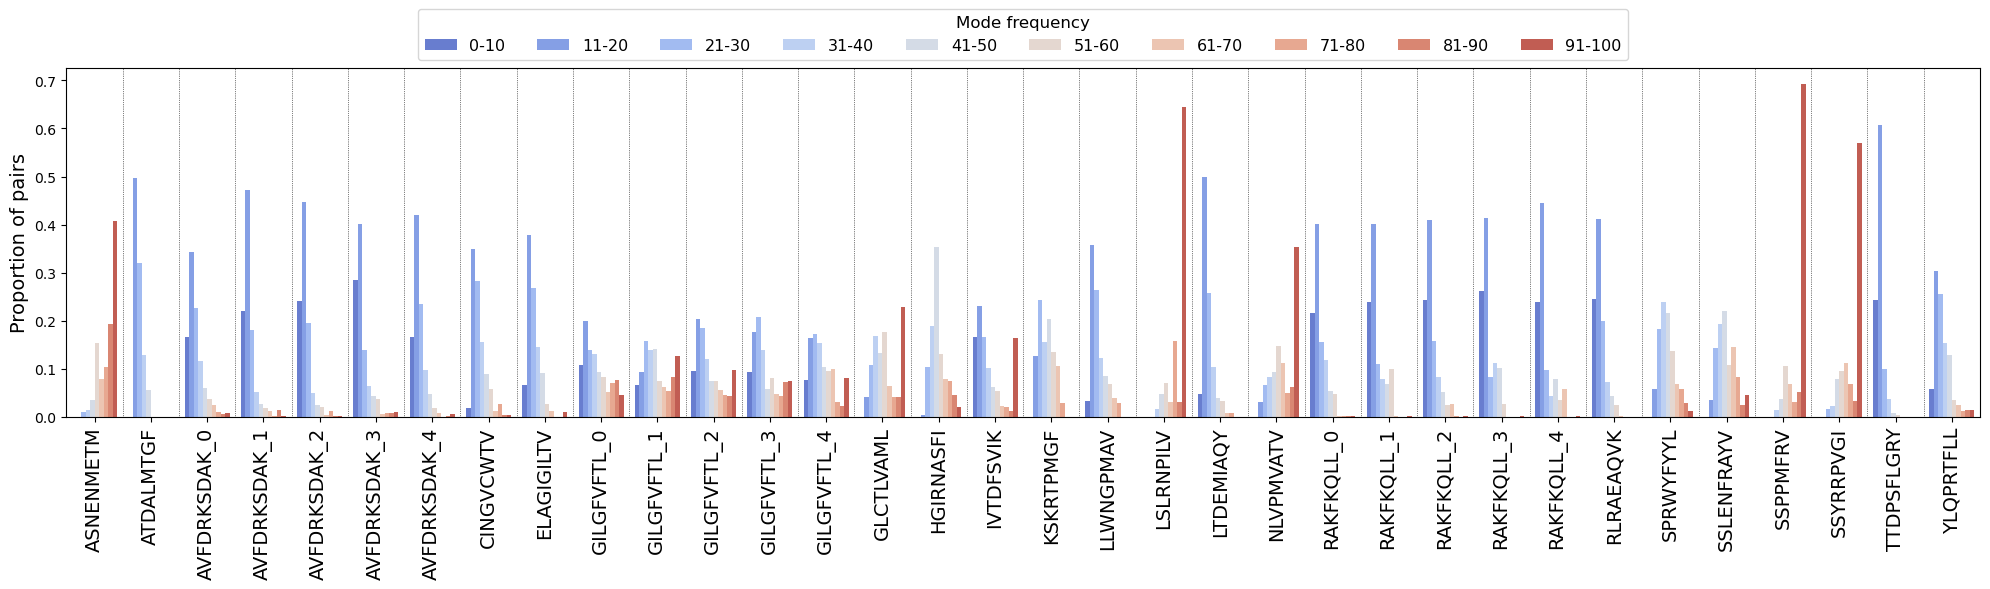

In [11]:
fig,ax=plt.subplots(figsize=(20,6))

sns.barplot(d.sort_values(by='epitope'),x='epitope',y='prop',hue='mode_class',ax=ax, palette='coolwarm', linewidth=0)
for i in range(0, len(epitopes)):
    ax.axvline(i+0.5, ls=':',c='k', lw=0.5)
ax.set_xlim(-0.5,len(epitopes)-0.5)
plt.xticks(list(range(0,len(epitopes))), rotation=90, fontsize=14)
plt.xlabel('')
plt.ylabel('Proportion of pairs', fontdict={'size':14})
plt.legend(bbox_to_anchor=[0.5,1], loc='lower center', 
           title = 'Mode frequency', title_fontsize=12, fontsize=11.5, ncols=10)
plt.tight_layout()
plt.savefig('figures/all_epitopes_mode_stability_GA.png',
                    bbox_inches='tight')
plt.show()

In [12]:
top_10 = grouped_results.loc[grouped_results['mode_freq'] >=95][['epitope','N','correct','prop', 'counts']].groupby(['epitope','N','correct']).sum().reset_index()

In [13]:
stable = pd.merge(top_10.loc[top_10['correct'] == True, ['epitope','prop', 'counts']].rename(columns={'prop':'correct','counts':'num_correct'}),
                  top_10.loc[top_10['correct'] == False, ['epitope','prop', 'counts']].rename(columns={'prop':'wrong','counts':'num_wrong'}),
                  how = 'outer').fillna(0)
print(stable)
for ep in epitopes:
    if ep not in stable['epitope'].unique():
        stable.loc[stable.shape[0]] = [ep,0,0,0,0]

         epitope   correct  num_correct     wrong  num_wrong
0      ASNENMETM  0.228856         46.0  0.119403       24.0
1   AVFDRKSDAK_0  0.002857          2.0  0.002857        2.0
2   AVFDRKSDAK_1  0.002857          2.0  0.000000        0.0
3   AVFDRKSDAK_2  0.001429          1.0  0.000000        0.0
4   AVFDRKSDAK_3  0.002857          2.0  0.001429        1.0
5   AVFDRKSDAK_4  0.002857          2.0  0.000000        0.0
6     ELAGIGILTV  0.010526          4.0  0.000000        0.0
7    GILGFVFTL_0  0.024286         17.0  0.004286        3.0
8    GILGFVFTL_1  0.041429         29.0  0.027143       19.0
9    GILGFVFTL_2  0.038571         27.0  0.018571       13.0
10   GILGFVFTL_3  0.034286         24.0  0.017143       12.0
11   GILGFVFTL_4  0.022857         16.0  0.042857       30.0
12     GLCTLVAML  0.110145         38.0  0.101449       35.0
13     IVTDFSVIK  0.088068         62.0  0.065341       46.0
14     LSLRNPILV  0.228346         29.0  0.401575       51.0
15     NLVPMVATV  0.1876

In [14]:
stable = stable.sort_values(by='epitope')
print(stable)

         epitope   correct  num_correct     wrong  num_wrong
0      ASNENMETM  0.228856         46.0  0.119403       24.0
32     ATDALMTGF  0.000000          0.0  0.000000        0.0
1   AVFDRKSDAK_0  0.002857          2.0  0.002857        2.0
2   AVFDRKSDAK_1  0.002857          2.0  0.000000        0.0
3   AVFDRKSDAK_2  0.001429          1.0  0.000000        0.0
4   AVFDRKSDAK_3  0.002857          2.0  0.001429        1.0
5   AVFDRKSDAK_4  0.002857          2.0  0.000000        0.0
27     CINGVCWTV  0.000000          0.0  0.000000        0.0
6     ELAGIGILTV  0.010526          4.0  0.000000        0.0
7    GILGFVFTL_0  0.024286         17.0  0.004286        3.0
8    GILGFVFTL_1  0.041429         29.0  0.027143       19.0
9    GILGFVFTL_2  0.038571         27.0  0.018571       13.0
10   GILGFVFTL_3  0.034286         24.0  0.017143       12.0
11   GILGFVFTL_4  0.022857         16.0  0.042857       30.0
12     GLCTLVAML  0.110145         38.0  0.101449       35.0
26     HGIRNASFI  0.0000

In [15]:
len(epitopes)

34

In [16]:
from matplotlib.patches import Patch

[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5, 22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5, 33.5]


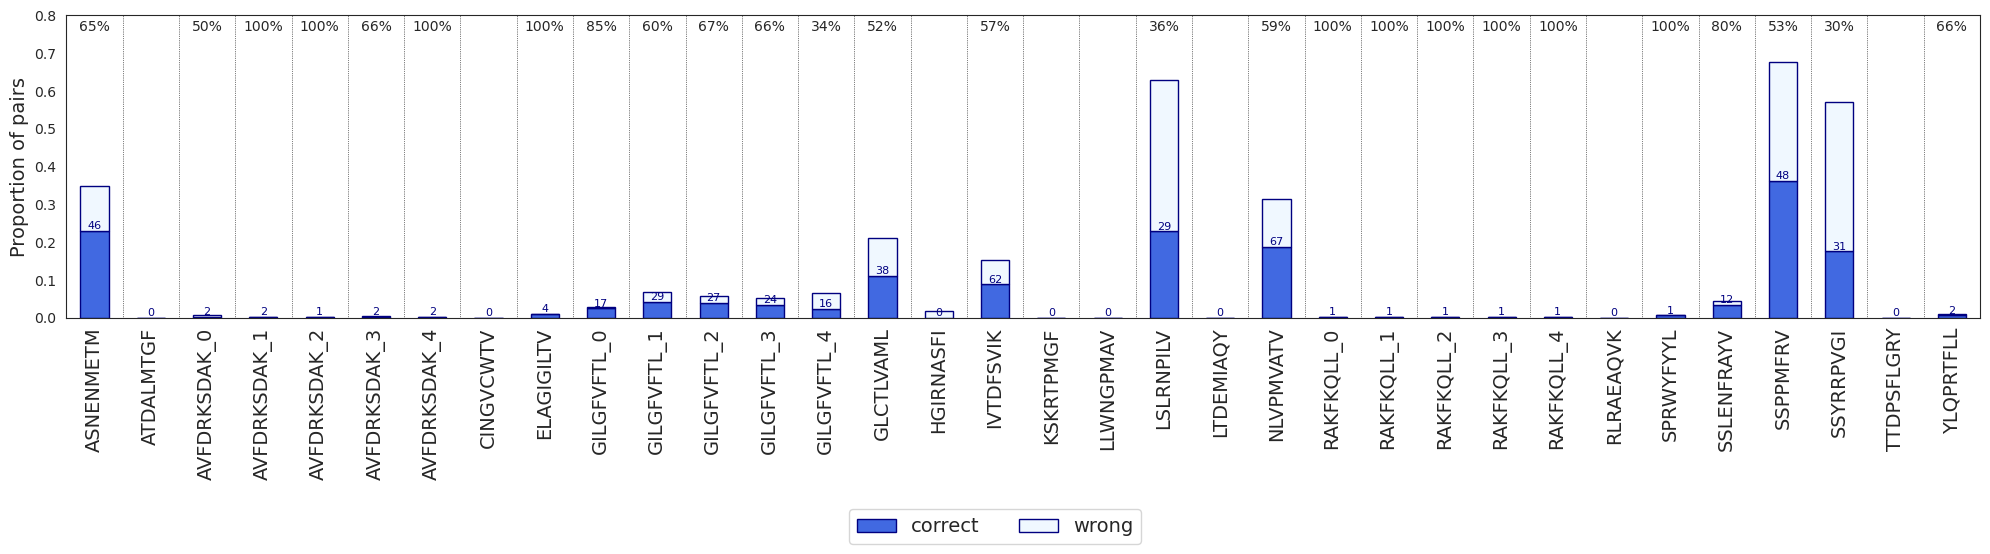

In [17]:
sns.set_style('white')

x_pos = list(np.array(range(0,len(stable['epitope'].unique()),1)) + 0.5)
x_pos1 = x_pos
print(x_pos)

f,ax = plt.subplots(figsize=(20,5))
ax.bar(x = x_pos, height = stable['correct'], color='royalblue', width=0.5, edgecolor = 'navy')
ax.bar(x = x_pos, height = stable['wrong'], color='aliceblue', width=0.5, edgecolor = 'navy',
       bottom = stable['correct'])
ax.set_xticks(x_pos1, stable['epitope'].unique().tolist(), rotation=90, fontsize=14)

legend_handles = [Patch(facecolor='royalblue',edgecolor='navy',label='correct, L=0.6'),
                  Patch(facecolor='aliceblue',edgecolor='navy',label='wrong, L=0.6')]
legend_labels = ['correct','wrong']

for x in np.array(x_pos) + 0.5:
    ax.axvline(x, c='k', ls=':', lw = 0.5)
for i,c in enumerate(stable['num_correct'].tolist()):
    if c > 0:
        tpr = stable.iloc[i]['correct'] / (stable.iloc[i]['correct'] + stable.iloc[i]['wrong'])
        text = str(int(tpr*100)) + '%'
        ax.text(x_pos[i], 0.75, text, horizontalalignment='center', verticalalignment='bottom', 
                fontsize=10)
    ax.text(x_pos[i], stable.iloc[i]['correct'], int(c), horizontalalignment='center', verticalalignment='bottom', 
            fontsize=8, color = 'navy')
ax.set_xlim(0,len(epitopes))
ax.set_ylim(0,0.8)
plt.ylabel('Proportion of pairs', fontdict={'size':14})
f.legend(legend_handles, legend_labels, ncols=4, bbox_to_anchor = [0.5,-0.01], loc='upper center', fontsize=14)
plt.tight_layout()
plt.savefig('figures/all_epitopes_stable_choices_GA_' + chosenDist +'.png',
                    bbox_inches='tight')
plt.show()